In [92]:
import numpy as np
import gym
from gym import wrappers
import time
import sys
import matplotlib.pyplot as plt

In [87]:
# environment  = 'FrozenLake8x8-v1'
from gym.envs.toy_text import frozen_lake
map_size = 8
np.random.seed(2)
# map_size^2 = state_size
custom_map = frozen_lake.generate_random_map(size=map_size, p=0.9)
custom_map

env = gym.make("FrozenLake-v1", desc=custom_map)
# env = gym.make(frozen_lake.FrozenLakeEnv, desc=custom_map)
# env = gym.make(environment)
env = env.unwrapped
desc = env.unwrapped.desc

In [88]:
## https://medium.com/@m.alzantot/deep-reinforcement-learning-demysitifed-episode-2-policy-iteration-value-iteration-and-q-978f9e89ddaa
def run_episode(env, policy, gamma, render = True):
    obs = env.reset()
    total_reward = 0
    step_idx = 0
    st = time.time()
    while True:
        if render:
            env.render()
        obs, reward, done , _ = env.step(int(policy[obs]))
        total_reward += (gamma ** step_idx * reward)
        step_idx += 1
        if done or time.time()-st > 0.01:
            break
    return total_reward

def extract_policy(env,v, gamma):
    policy = np.zeros(env.nS)
    for s in range(env.nS):
        q_sa = np.zeros(env.nA)
        for a in range(env.nA):
            q_sa[a] = sum([p * (r + gamma * v[s_]) for p, s_, r, _ in  env.P[s][a]])
        policy[s] = np.argmax(q_sa)
    return policy

def compute_policy_v(env, policy, gamma):
    v = np.zeros(env.nS)
    eps = 1e-5
    while True:
        prev_v = np.copy(v)
        for s in range(env.nS):
            policy_a = policy[s]
            v[s] = sum([p * (r + gamma * prev_v[s_]) for p, s_, r, is_done in env.P[s][policy_a]])
        if (np.sum((np.fabs(prev_v - v))) <= eps):
            break
    return v

def evaluate_policy(env, policy, gamma , n = 100):
    scores = [run_episode(env, policy, gamma, False) for _ in range(n)]
    return np.mean(scores)

def plot_policy_map(title, policy, map_desc, color_map, direction_map):
    fig = plt.figure()
    ax = fig.add_subplot(111, xlim=(0, policy.shape[1]), ylim=(0, policy.shape[0]))
    font_size = 'x-large'
    if policy.shape[1] > 16:
        font_size = 'small'
    plt.title(title)
    for i in range(policy.shape[0]):
        for j in range(policy.shape[1]):
            y = policy.shape[0] - i - 1
            x = j
            p = plt.Rectangle([x, y], 1, 1)
            p.set_facecolor(color_map[map_desc[i,j]])
            ax.add_patch(p)

            text = ax.text(x+0.5, y+0.5, direction_map[policy[i, j]], weight='bold', size=font_size,
                           horizontalalignment='center', verticalalignment='center', color='w')


    plt.axis('off')
    plt.xlim((0, policy.shape[1]))
    plt.ylim((0, policy.shape[0]))
    plt.tight_layout()
    plt.show()
#     plt.savefig([title, '.png'])
    plt.close()

    return (plt)

def colors_lake():
    return {
        b'S': 'yellow',
        b'F': 'blue',
        b'H': 'black',
        b'G': 'red',
    }




def directions_lake():
    return {
        3: '⬆',
        2: '➡',
        1: '⬇',
        0: '⬅'
    }

In [89]:
def policy_iteration(env, gamma):
    policy = np.random.choice(env.nA, size=(env.nS))  
    max_iters = 3000
    desc = env.unwrapped.desc
    for i in range(max_iters):
        old_policy_v = compute_policy_v(env, policy, gamma)
        new_policy = extract_policy(env,old_policy_v, gamma)
        if (np.all(policy == new_policy)):
            k=i+1
            break
        policy = new_policy
        k = 1+1
        if i % 50 == 0:
            print(i)
    plot = plot_policy_map('PI Policy Map, Iteration '+ str(i) + ', Gamma: ' + str(gamma),policy.reshape(map_size,map_size),desc,colors_lake(),directions_lake())
    return policy,k

0


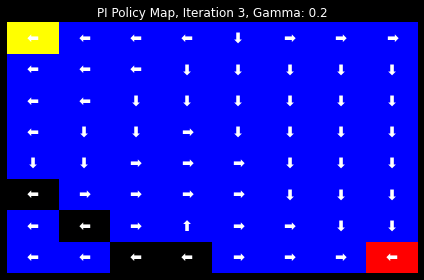

4.2279122427975245e-18
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950


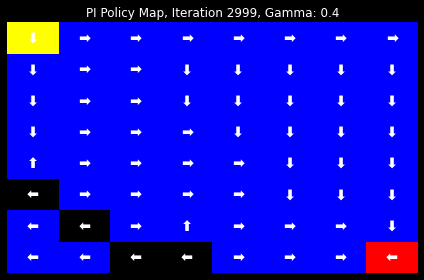

2.15010268799098e-09
0


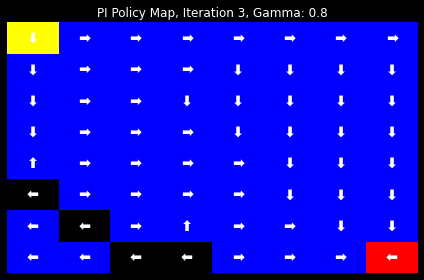

0.0020530289477967605
0


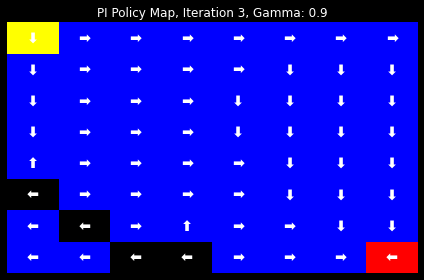

0.03290176646124023
0


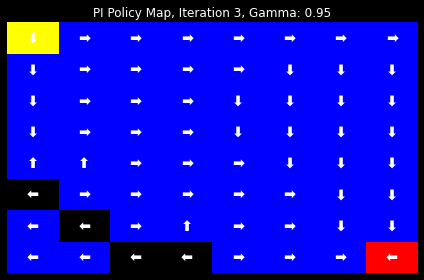

0.15712160704633474
0


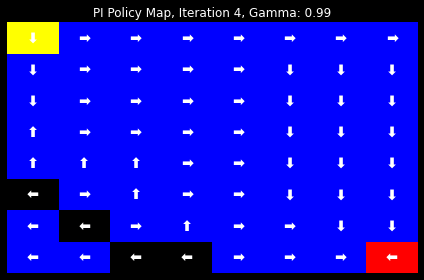

0.6451629607673505
0


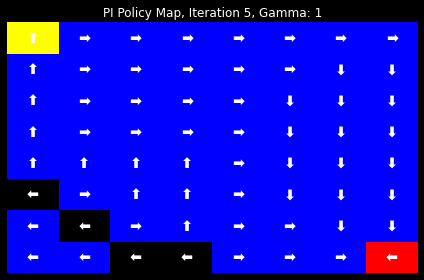

1.0
[0.2, 0.4, 0.8, 0.9, 0.95, 0.99, 1]
[1.4565742015838623, 17.814123153686523, 1.8104188442230225, 1.3842976093292236, 1.4834976196289062, 1.5798096656799316, 2.2998147010803223]
[4.2279122427975245e-18, 2.15010268799098e-09, 0.0020530289477967605, 0.03290176646124023, 0.15712160704633474, 0.6451629607673505, 1.0]
[4, 2, 4, 4, 4, 5, 6]


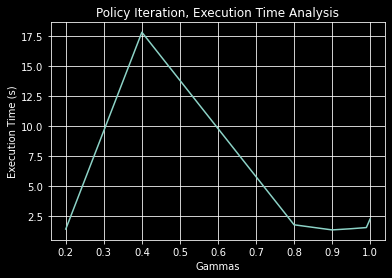

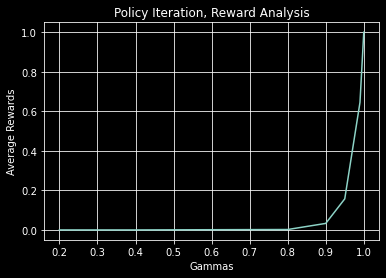

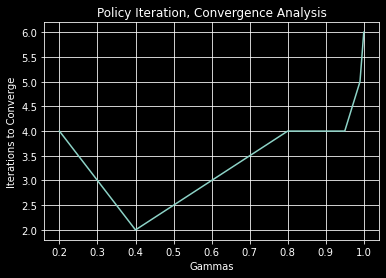

In [54]:
time_array=[0]*7
gamma_arr=[0]*7
iters=[0]*7
list_scores=[0]*7

for i, gamma in enumerate([0.2, 0.4, 0.8, 0.9, 0.95, 0.99, 1]):
    st=time.time()
    best_policy,k = policy_iteration(env, gamma = gamma)
    scores = evaluate_policy(env, best_policy, gamma = gamma)
    print(scores)
    end=time.time()
    gamma_arr[i]=gamma
    list_scores[i]=np.mean(scores)
    iters[i] = k
    time_array[i]=end-st

print(gamma_arr)
print(time_array)
print(list_scores)
print(iters)
plt.plot(gamma_arr, time_array)
plt.xlabel('Gammas')
plt.title('Policy Iteration, Execution Time Analysis')
plt.ylabel('Execution Time (s)')
plt.grid()
plt.savefig("PI_ExecutionTime_FL.png")
plt.show()

plt.plot(gamma_arr,list_scores)
plt.xlabel('Gammas')
plt.ylabel('Average Rewards')
plt.title('Policy Iteration, Reward Analysis')
plt.grid()
plt.savefig("PI_AverageRewards_FL.png")
plt.show()

plt.plot(gamma_arr,iters)
plt.xlabel('Gammas')
plt.ylabel('Iterations to Converge')
plt.title('Policy Iteration, Convergence Analysis')
plt.grid()
plt.savefig("PI_Convergence_FL.png")
plt.show()

In [55]:
def value_iteration(env, gamma = 1.0):
    v = np.zeros(env.nS)  # initialize value-function
    max_iterations = 10000
    desc = env.unwrapped.desc
    eps = 1e-20
    for i in range(max_iterations):
        if i % 500 == 0:
            print(i)
        prev_v = np.copy(v)
        for s in range(env.nS):
            q_sa = [sum([p*(r + prev_v[s_]) for p, s_, r, _ in env.P[s][a]]) for a in range(env.nA)] 
            v[s] = max(q_sa)
        if (np.sum(np.fabs(prev_v - v)) <= eps):
            k = i+1
            break
        k = i+1
    policy = extract_policy(env, v, gamma)
    plot = plot_policy_map('VI Policy Map, Iteration '+ str(i) + ', Gamma: ' + str(gamma),policy.reshape(map_size,map_size),desc,colors_lake(),directions_lake())
    return v, k

0
500


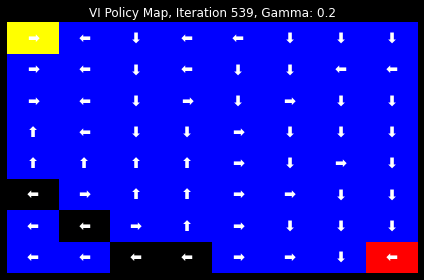

2.1475122370615893e-24
0
500


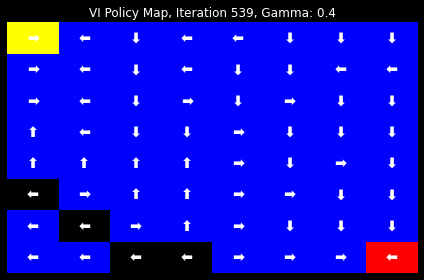

1.1834562849945387e-16
0
500


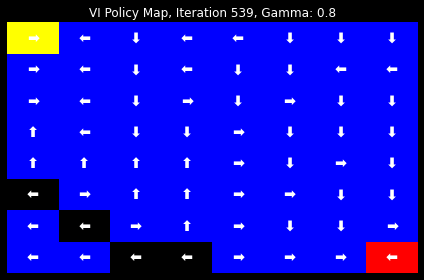

4.309197731672943e-05
0
500


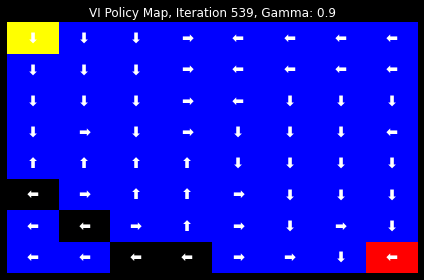

0.016093555310639572
0
500


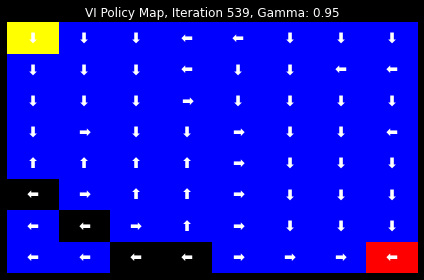

0.10128857324755765
0
500


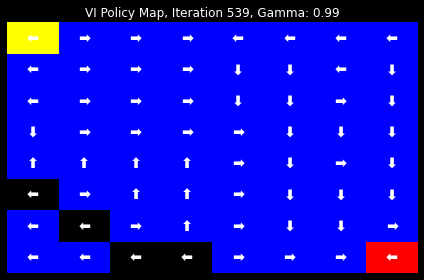

0.5251889464057621
0
500


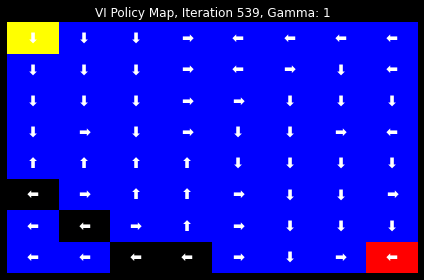

1.0
[0.2, 0.4, 0.8, 0.9, 0.95, 0.99, 1]
[2.3892602920532227, 1.9559686183929443, 2.102844715118408, 2.2828965187072754, 2.0285747051239014, 1.8610219955444336, 1.821129560470581]
[2.1475122370615893e-24, 1.1834562849945387e-16, 4.309197731672943e-05, 0.016093555310639572, 0.10128857324755765, 0.5251889464057621, 1.0]
[540, 540, 540, 540, 540, 540, 540]


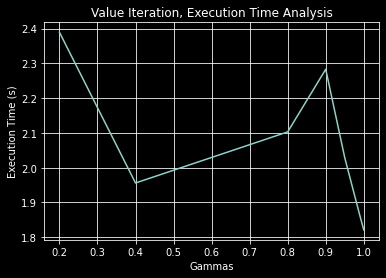

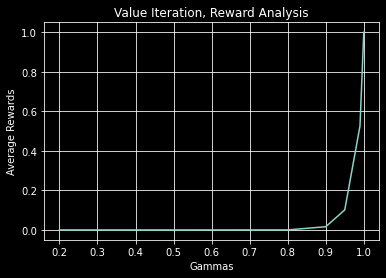

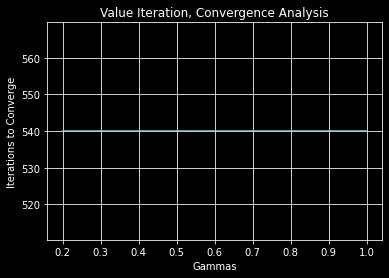

In [56]:
time_array=[0]*7
gamma_arr=[0]*7
iters=[0]*7
list_scores=[0]*7

for i, gamma in enumerate([0.2, 0.4, 0.8, 0.9, 0.95, 0.99, 1]):
    st=time.time()
    optimal_v, k = value_iteration(env, gamma = gamma)
    policy = extract_policy(env, optimal_v, gamma)
    scores = evaluate_policy(env, policy, gamma = gamma)
    print(scores)
    end=time.time()
    gamma_arr[i]=gamma
    list_scores[i]=np.mean(scores)
    iters[i] = k
    time_array[i]=end-st

print(gamma_arr)
print(time_array)
print(list_scores)
print(iters)
plt.plot(gamma_arr, time_array)
plt.xlabel('Gammas')
plt.title('Value Iteration, Execution Time Analysis')
plt.ylabel('Execution Time (s)')
plt.grid()
plt.savefig("VI_ExecutionTime_FL.png")
plt.show()

plt.plot(gamma_arr,list_scores)
plt.xlabel('Gammas')
plt.ylabel('Average Rewards')
plt.title('Value Iteration, Reward Analysis')
plt.grid()
plt.savefig("VI_AverageRewards_FL.png")
plt.show()

plt.plot(gamma_arr,iters)
plt.xlabel('Gammas')
plt.ylabel('Iterations to Converge')
plt.title('Value Iteration, Convergence Analysis')
plt.grid()
plt.savefig("VI_Convergence_FL.png")
plt.show()

In [57]:
# environment  = 'FrozenLake8x8-v1'
from gym.envs.toy_text import frozen_lake
map_size = 8
np.random.seed(2)
# map_size^2 = state_size
custom_map = frozen_lake.generate_random_map(size=map_size, p=0.8)
custom_map

env = gym.make("FrozenLake-v1", desc=custom_map)
# env = gym.make(frozen_lake.FrozenLakeEnv, desc=custom_map)
# env = gym.make(environment)
env = env.unwrapped
desc = env.unwrapped.desc

In [58]:
# https://gist.github.com/jojonki/6291f8c3b19799bc2f6d5279232553d7
# Q learning params
ALPHA = 0.1 # learning rate
GAMMA = 0.999 # reward discount
LEARNING_COUNT = 50000
TEST_COUNT = 1000

TURN_LIMIT = 20000

class Agent:
    def __init__(self, env, map_size):
        self.env = env
        self.episode_reward = 0.0
        self.epsilon = 1.0
        self.q_val = np.zeros(map_size * map_size * 4).reshape(map_size*map_size, 4).astype(np.float32)
        #exploartion decreasing decay for exponential decreasing
        self.epsilon_decay = 0.9999
        # minimum of exploration proba
        self.epsilon_min = 0.01

    def learn(self):
        # one episode learning
        state = self.env.reset()
        total_reward = 0.0
        #self.env.render()
        
        for t in range(TURN_LIMIT):
            pn = np.random.random()
            if pn < self.epsilon:
                act = self.env.action_space.sample() # random
            else:
                act = self.q_val[state].argmax()
            next_state, reward, done, info = self.env.step(act)
            total_reward += reward
            q_next_max = np.max(self.q_val[next_state])
            # Q <- Q + a(Q' - Q)
            # <=> Q <- (1-a)Q + a(Q')
            self.q_val[state][act] = (1 - ALPHA) * self.q_val[state][act] + ALPHA * (reward + GAMMA * q_next_max - self.q_val[state, act])
            #self.env.render()
            if done or t == TURN_LIMIT - 1:
                return total_reward
            else:
                state = next_state
        self.epsilon = max(self.epsilon_min, self.epsilon_decay*self.epsilon)

    def test(self):
        state = self.env.reset()
        total_reward = 0.0
        for t in range(TURN_LIMIT):
            act = np.argmax(self.q_val[state])
            next_state, reward, done, info = self.env.step(act)
            total_reward += reward
            if done or t == TURN_LIMIT - 1:
                return total_reward
            else:
                state = next_state
        return 0.0 # over limit

agent = Agent(env, map_size)

print("###### LEARNING #####")
reward_total = 0.0
for i in range(LEARNING_COUNT):
    reward = agent.learn()
    reward_total += reward
#     print(reward)
    if i % 10000 == 0:
        print(i)
print("episodes      : {}".format(LEARNING_COUNT))
print("total reward  : {}".format(reward_total))
print("average reward: {:.2f}".format(reward_total / LEARNING_COUNT))
print("Q Value       :{}".format(agent.q_val))

print("###### TEST #####")
reward_total = 0.0
for i in range(TEST_COUNT):
    reward = agent.test()
    reward_total += reward
    if i % 100 == 0:
        print(i)
#     print(reward)
print("episodes      : {}".format(TEST_COUNT))
print("total reward  : {}".format(reward_total))
print("average reward: {:.2f}".format(reward_total / TEST_COUNT))

policy = [np.argmax(agent.q_val[state]) for state in range(map_size*map_size)]
policy = np.array(policy)

###### LEARNING #####
0
10000
20000
30000
40000
episodes      : 50000
total reward  : 679.0
average reward: 0.01
Q Value       :[[3.04464010e-07 6.68218377e-07 5.15828731e-07 4.21855589e-07]
 [8.88812110e-07 1.09932523e-06 1.58098908e-06 1.06829441e-06]
 [2.76171909e-06 4.16966623e-06 5.04588888e-06 3.29404406e-06]
 [8.32352998e-06 9.17543639e-06 1.32564282e-05 1.10976107e-05]
 [1.36451572e-05 2.51066922e-05 1.97512145e-05 2.32409147e-05]
 [4.81929892e-05 5.85119269e-05 6.55748081e-05 2.29700454e-05]
 [4.98501686e-05 1.02467529e-04 1.29895649e-04 5.20293688e-05]
 [8.51506193e-05 1.30115586e-04 8.10114725e-05 5.71102319e-05]
 [2.73650073e-07 9.42954784e-07 6.54102507e-07 5.90011609e-07]
 [8.51396408e-07 2.21344544e-06 2.23262168e-06 7.36325035e-07]
 [1.55555153e-06 5.34362925e-06 5.78217214e-06 7.82625284e-06]
 [9.55921223e-06 2.53758099e-05 2.97590614e-05 1.23224681e-05]
 [4.80336566e-05 6.83080507e-05 5.54033795e-05 3.24959619e-05]
 [1.35894181e-04 1.60776821e-04 1.69423642e-04 9.4829

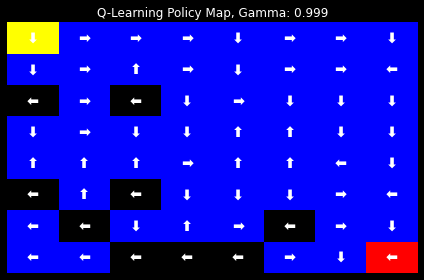

In [59]:
plot = plot_policy_map('Q-Learning Policy Map, Gamma: ' + str(GAMMA),policy.reshape(map_size,map_size),desc,colors_lake(),directions_lake())

###### LEARNING #####
0
10000
20000
30000
40000
gamma         : 0.2
episodes      : 50000
total reward  : 644.0
average reward: 0.01
###### TEST #####
0
100
200
300
400
500
600
700
800
900
episodes      : 1000
total reward  : 146.0
average reward: 0.15
###### LEARNING #####
0
10000
20000
30000
40000
gamma         : 0.4
episodes      : 50000
total reward  : 728.0
average reward: 0.01
###### TEST #####
0
100
200
300
400
500
600
700
800
900
episodes      : 1000
total reward  : 437.0
average reward: 0.44
###### LEARNING #####
0
10000
20000
30000
40000
gamma         : 0.8
episodes      : 50000
total reward  : 700.0
average reward: 0.01
###### TEST #####
0
100
200
300
400
500
600
700
800
900
episodes      : 1000
total reward  : 112.0
average reward: 0.11
###### LEARNING #####
0
10000
20000
30000
40000
gamma         : 0.9
episodes      : 50000
total reward  : 692.0
average reward: 0.01
###### TEST #####
0
100
200
300
400
500
600
700
800
900
episodes      : 1000
total reward  : 268.0
average r

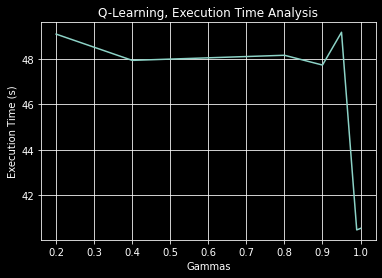

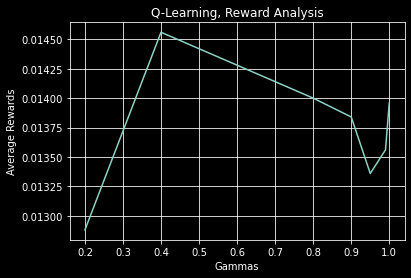

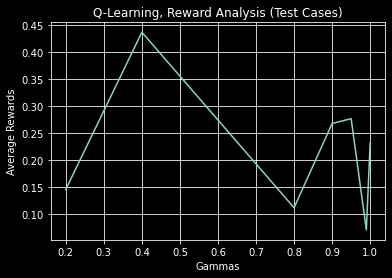

In [60]:
time_array=[0]*7
gamma_arr=[0]*7
list_scores=[0]*7
list_scores_test=[0]*7
policy = []

for j, gamma in enumerate([0.2, 0.4, 0.8, 0.9, 0.95, 0.99, 1]):
    st=time.time()
    GAMMA = gamma
    agent = Agent(env, map_size)
    print("###### LEARNING #####")
    reward_total = 0.0
    for i in range(LEARNING_COUNT):
        reward = agent.learn()
        reward_total += reward
    #     print(reward)
        if i % 10000 == 0:
            print(i)
    print("gamma         : {}".format(GAMMA))
    print("episodes      : {}".format(LEARNING_COUNT))
    print("total reward  : {}".format(reward_total))
    print("average reward: {:.2f}".format(reward_total / LEARNING_COUNT))
#     print("Q Value       :{}".format(agent.q_val))
    end=time.time()
    gamma_arr[j]=gamma
    list_scores[j]=reward_total / LEARNING_COUNT
    time_array[j]=end-st
    
    print("###### TEST #####")
    reward_total = 0.0
    for i in range(TEST_COUNT):
        reward = agent.test()
        reward_total += reward
        if i % 100 == 0:
            print(i)
    #     print(reward)
    print("episodes      : {}".format(TEST_COUNT))
    print("total reward  : {}".format(reward_total))
    print("average reward: {:.2f}".format(reward_total / TEST_COUNT))
    
    policy_curr = [np.argmax(agent.q_val[state]) for state in range(map_size*map_size)]
    policy_curr = np.array(policy_curr)
    policy.append(policy_curr)
    list_scores_test[j]=reward_total / TEST_COUNT

print(gamma_arr)
print(time_array)
print(list_scores)
plt.plot(gamma_arr, time_array)
plt.xlabel('Gammas')
plt.title('Q-Learning, Execution Time Analysis')
plt.ylabel('Execution Time (s)')
plt.grid()
plt.savefig("Q_ExecutionTime_FL.png")
plt.show()

plt.plot(gamma_arr,list_scores)
plt.xlabel('Gammas')
plt.ylabel('Average Rewards')
plt.title('Q-Learning, Reward Analysis')
plt.grid()
plt.savefig("Q_AverageRewards_FL.png")
plt.show()

plt.plot(gamma_arr,list_scores_test)
plt.xlabel('Gammas')
plt.ylabel('Average Rewards')
plt.title('Q-Learning, Reward Analysis (Test Cases)')
plt.grid()
plt.savefig("Q_AverageRewardsTest_FL.png")
plt.show()



In [61]:
print(list_scores_test)

[0.146, 0.437, 0.112, 0.268, 0.277, 0.071, 0.232]


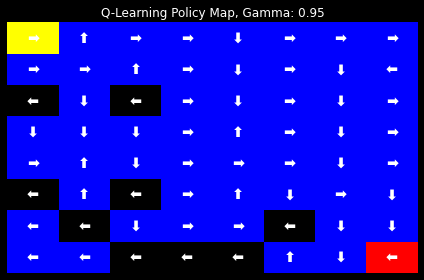

In [62]:
plot = plot_policy_map('Q-Learning Policy Map, Gamma: ' + str(0.95),policy[4].reshape(map_size,map_size),desc,colors_lake(),directions_lake())

In [63]:
# environment  = 'FrozenLake8x8-v1'
from gym.envs.toy_text import frozen_lake
map_size = 8
np.random.seed(2)
# map_size^2 = state_size
custom_map = frozen_lake.generate_random_map(size=map_size, p=0.9)
custom_map

env = gym.make("FrozenLake-v1", desc=custom_map)
# env = gym.make(frozen_lake.FrozenLakeEnv, desc=custom_map)
# env = gym.make(environment)
env = env.unwrapped
desc = env.unwrapped.desc

###### LEARNING #####
0
10000
20000
30000
40000
gamma         : 0.2
episodes      : 50000
total reward  : 9340.0
average reward: 0.19
###### TEST #####
0
100
200
300
400
500
600
700
800
900
episodes      : 1000
total reward  : 512.0
average reward: 0.51
###### LEARNING #####
0
10000
20000
30000
40000
gamma         : 0.4
episodes      : 50000
total reward  : 9214.0
average reward: 0.18
###### TEST #####
0
100
200
300
400
500
600
700
800
900
episodes      : 1000
total reward  : 870.0
average reward: 0.87
###### LEARNING #####
0
10000
20000
30000
40000
gamma         : 0.8
episodes      : 50000
total reward  : 9424.0
average reward: 0.19
###### TEST #####
0
100
200
300
400
500
600
700
800
900
episodes      : 1000
total reward  : 746.0
average reward: 0.75
###### LEARNING #####
0
10000
20000
30000
40000
gamma         : 0.9
episodes      : 50000
total reward  : 9184.0
average reward: 0.18
###### TEST #####
0
100
200
300
400
500
600
700
800
900
episodes      : 1000
total reward  : 565.0
avera

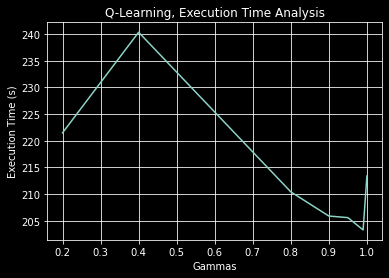

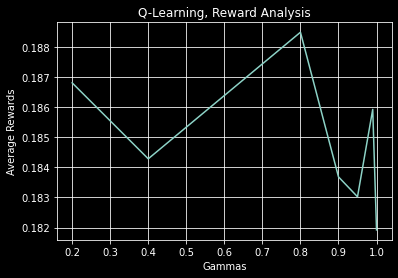

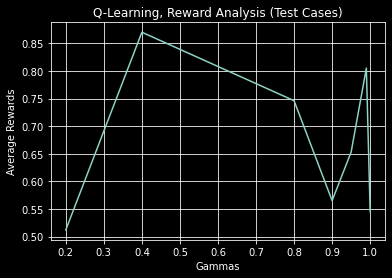

In [64]:


for j, gamma in enumerate([0.2, 0.4, 0.8, 0.9, 0.95, 0.99, 1]):
    st=time.time()
    GAMMA = gamma
    agent = Agent(env, map_size)
    print("###### LEARNING #####")
    reward_total = 0.0
    for i in range(LEARNING_COUNT):
        reward = agent.learn()
        reward_total += reward
    #     print(reward)
        if i % 10000 == 0:
            print(i)
    print("gamma         : {}".format(GAMMA))
    print("episodes      : {}".format(LEARNING_COUNT))
    print("total reward  : {}".format(reward_total))
    print("average reward: {:.2f}".format(reward_total / LEARNING_COUNT))
#     print("Q Value       :{}".format(agent.q_val))
    end=time.time()
    gamma_arr[j]=gamma
    list_scores[j]=reward_total / LEARNING_COUNT
    time_array[j]=end-st
    
    print("###### TEST #####")
    reward_total = 0.0
    for i in range(TEST_COUNT):
        reward = agent.test()
        reward_total += reward
        if i % 100 == 0:
            print(i)
    #     print(reward)
    print("episodes      : {}".format(TEST_COUNT))
    print("total reward  : {}".format(reward_total))
    print("average reward: {:.2f}".format(reward_total / TEST_COUNT))
    
    policy_curr = [np.argmax(agent.q_val[state]) for state in range(map_size*map_size)]
    policy_curr = np.array(policy_curr)
    policy.append(policy_curr)
    list_scores_test[j]=reward_total / TEST_COUNT

print(gamma_arr)
print(time_array)
print(list_scores)
print(iters)
plt.plot(gamma_arr, time_array)
plt.xlabel('Gammas')
plt.title('Q-Learning, Execution Time Analysis')
plt.ylabel('Execution Time (s)')
plt.grid()
plt.savefig("Q_ExecutionTime_FL_Small.png")
plt.show()

plt.plot(gamma_arr,list_scores)
plt.xlabel('Gammas')
plt.ylabel('Average Rewards')
plt.title('Q-Learning, Reward Analysis')
plt.grid()
plt.savefig("Q_AverageRewards_FL_Small.png")
plt.show()

plt.plot(gamma_arr,list_scores_test)
plt.xlabel('Gammas')
plt.ylabel('Average Rewards')
plt.title('Q-Learning, Reward Analysis (Test Cases)')
plt.grid()
plt.savefig("Q_AverageRewardsTest_FL_Small.png")
plt.show()


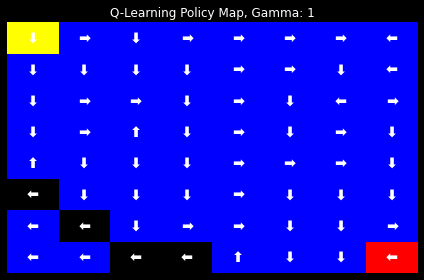

In [65]:
plot = plot_policy_map('Q-Learning Policy Map, Gamma: ' + str(1),policy[6].reshape(map_size,map_size),desc,colors_lake(),directions_lake())

In [93]:
import numpy as np
import gym
from gym import wrappers
import time
import matplotlib.pyplot as plt

import matplotlib.style
def run_episode(env, policy, gamma, render = True):
    obs = env.reset()
    total_reward = 0
    step_idx = 0
    while True:
        #if render:
        #env.render()
        obs, reward, done , _ = env.step(int(policy[obs]))
        total_reward += (gamma ** step_idx * reward)
        step_idx += 1
        if done:
            break
    return total_reward


def evaluate_policy(env, policy, gamma = 1.0, n = 100):
    scores = [run_episode(env, policy, gamma, False) for _ in range(n)]
    return np.mean(scores)

def extract_policy(env, v, gamma = 1.0):
    policy = np.zeros(env.nS)
    for s in range(env.nS):
        q_sa = np.zeros(env.nA)
        for a in range(env.nA):
            q_sa[a] = sum([p * (r + gamma * v[s_]) for p, s_, r, _ in  env.P[s][a]])
        policy[s] = np.argmax(q_sa)
    return policy

def compute_policy_v(env, policy, gamma=1.0):
    v = np.zeros(env.nS)
    eps = 1e-5
    while True:
        prev_v = np.copy(v)
        for s in range(env.nS):
            policy_a = policy[s]
            v[s] = sum([p * (r + gamma * prev_v[s_]) for p, s_, r, is_done in env.P[s][policy_a]])
        if (np.sum((np.fabs(prev_v - v))) <= eps):
            break
    return v

def policy_iteration(env, gamma):
    policy = np.random.choice(env.nA, size=(env.nS))
    max_iterations = 1000
    for i in range(max_iterations):
        old_policy_v = compute_policy_v(env, policy, gamma)
        new_policy = extract_policy(env, old_policy_v, gamma)
        if (np.all(policy == new_policy)):
            iters=i+1
            print ('PI converged at: %d' %(i+1))
            break
        policy = new_policy
    return policy, iters

def value_iteration(env, gamma):
    v = np.zeros(env.nS)  
    max_iterations = 1000
    eps = 1e-20
    for i in range(max_iterations):
        prev_v = np.copy(v)
        for s in range(env.nS):
            q_sa = [sum([p*(r + gamma*prev_v[s_]) for p, s_, r, _ in env.P[s][a]]) for a in range(env.nA)] 
            v[s] = max(q_sa)
        if (np.sum(np.fabs(prev_v - v)) <= eps):
            iters=i+1
            print ('VI converged at: %d' %(i+1))
            break
    return v,iters

def colors_taxi():
    return {
        b'+': 'black',
        b'|': 'black',
        b'-': 'black',
        b'R': 'red',
        b'Y': 'yellow',
        b'B': 'blue',
        b'G': 'green',
        b' ': 'white',
        b':': 'pink',
    }




def directions_taxi():
    return {
        5: 'drop',
        4: 'pick',
        3: '⬅',
        2: '➡',
        1: '⬆',
        0: '⬇'
    }

def plots(gammas, array, yaxis, title):
    plt.plot(gammas, array)
    plt.xticks(gammas)
    plt.title(title)
    plt.ylabel(yaxis)
    plt.xlabel('Gammas')
    plt.grid()

    plt.show()
    
def plot_rewards(rewards, title, ylabel):
    plt.plot(rewards)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel('Number of Episodes')
    plt.grid()

    plt.show()
    
def plot_iters(iters, title, ylabel):
    plt.plot(iters)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel('Number of Episodes')
    plt.grid()

    plt.show()


Running Gamma: 0.35
PI converged at: 17
Running Gamma: 0.45
PI converged at: 16
Running Gamma: 0.55
PI converged at: 17
Running Gamma: 0.65
PI converged at: 15
Running Gamma: 0.75
PI converged at: 17
Running Gamma: 0.85
PI converged at: 18
Running Gamma: 0.95
PI converged at: 17


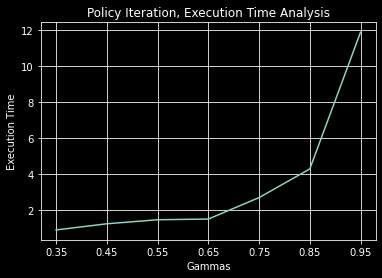

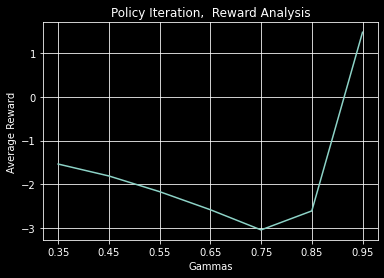

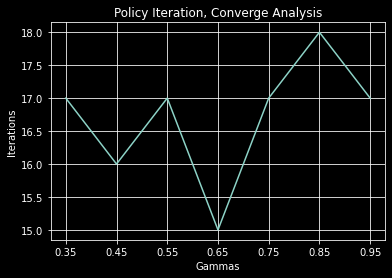

In [70]:
env = gym.make('Taxi-v3')
gammas=[(i+0.5)/10 for i in range(3, 10)]
time_arr, score_arr, iters_arr = [],[],[]
for g in gammas:
    print('Running Gamma: '+str(g))
    s=time.time()
    optimal_policy,k = policy_iteration(env, gamma=g)
    scores = evaluate_policy(env, optimal_policy, gamma=g)
    time_arr.append(time.time()-s)
    score_arr.append(np.mean(scores))
    iters_arr.append(k)
plots(gammas, time_arr, 'Execution Time', 'Policy Iteration, Execution Time Analysis')
plots(gammas, score_arr, 'Average Reward', 'Policy Iteration,  Reward Analysis')


Running Gamma: 0.35
VI converged at: 41
Running Gamma: 0.45
VI converged at: 53
Running Gamma: 0.55
VI converged at: 74
Running Gamma: 0.65
VI converged at: 96
Running Gamma: 0.75
VI converged at: 139
Running Gamma: 0.85
VI converged at: 233
Running Gamma: 0.95
VI converged at: 687


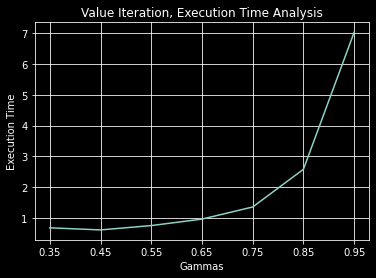

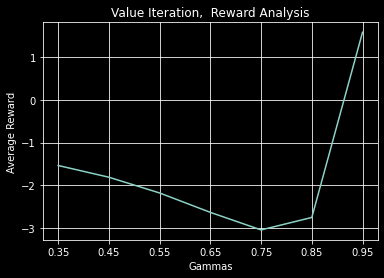

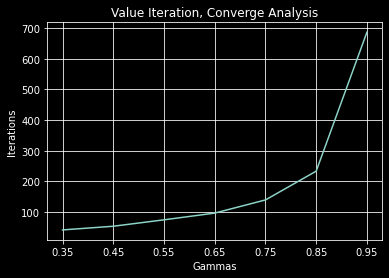

In [72]:
env = gym.make('Taxi-v3')
gammas=[(i+0.5)/10 for i in range(3, 10)]
time_arr, score_arr, iters_arr = [],[],[]
for g in gammas:
    print('Running Gamma: '+str(g))
    s=time.time()
    optimal_v,k = value_iteration(env, gamma=g)
    policy = extract_policy(env, optimal_v, gamma=g)
    scores = evaluate_policy(env, policy, gamma=g, n=10)
    time_arr.append(time.time()-s)
    iters_arr.append(k)
    score_arr.append(np.mean(scores))
plots(gammas, time_arr, 'Execution Time', 'Value Iteration, Execution Time Analysis')
plots(gammas, score_arr, 'Average Reward', 'Value Iteration,  Reward Analysis')


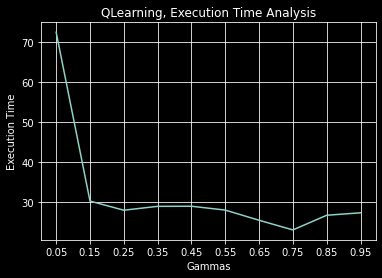

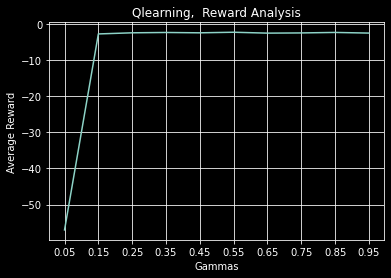

In [94]:
import gym
import itertools
import matplotlib.style
import matplotlib.pyplot as plt
import numpy as np
import sys

from collections import defaultdict, namedtuple
import random
from IPython.display import clear_output
import time
matplotlib.style.use('dark_background')
np.random.seed(23)
random.seed(23)
env = gym.make('Taxi-v3')

def greedyEpsilon(Q, eps, num_a):
    def nest(s):
        probA = np.ones(num_a) * eps / num_a
        bestA = np.argmax(Q[s])
        probA[bestA] += (1.0 - eps)
        return probA
    return nest
def qLearning(env, episodes, discount = 0.95, alpha = 0.95, eps = 0.1):

    Q = defaultdict(lambda: np.zeros(env.nA))
    test_r = []
    wut = []
    iters2 = []
    policy = greedyEpsilon(Q, eps, env.nA)
    time_arr = []
    for episode in range(episodes):
        r=0
        s = env.reset()
        i2 = 0
        #st = time.time()
        for t in itertools.count():
            probA = policy(s)
            a = np.random.choice(np.arange(len(probA)),p = probA)
            s_prime, reward, done, _ = env.step(a)
            r += reward    
            best_next_a = np.argmax(Q[s_prime])    
            td_target = reward + discount * Q[s_prime][best_next_a]
            td_delta = td_target - Q[s][a]
            Q[s][a] += alpha * td_delta
            i2 += t
            
            if done:
                break
                
            s = s_prime
        #time_arr.append(time.time() - st)
        clear_output(wait=True)
        iters2.append(i2)
        test_r.append(r)
        
    wut = np.cumsum(test_r)/np.arange(1,episodes+1)
    iters3 = np.cumsum(iters2)/np.arange(1,episodes+1)
    return Q, wut, iters3, time_arr

gammas=[(i+0.5)/10 for i in range(10)]
reward_arr = []
time_arr = []
for g in gammas:
    s=time.time()
    Q, rewards, iters, time_x = qLearning(env, 6000, discount=g)
    reward_arr.append(max(rewards))
    time_arr.append(time.time()-s)
    
plots(gammas, time_arr, 'Execution Time', 'QLearning, Execution Time Analysis')
plots(gammas, reward_arr, 'Average Reward', 'Qlearning,  Reward Analysis')

<module 'time' (built-in)>